# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

  <img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [304]:
df = pd.read_csv('data/colors.csv')

In [305]:
df.shape

(135, 4)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB




> Get the number of values in the rgb column





In [307]:
df.rgb.value_counts().sum()

135



> The number of the rgb values that are unique is given by the nunique method.



In [308]:
df.rgb.nunique()

124

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.



> Use the groupby function to group the data by the 'is_trans' column, count the values and display the table in consise form by choosing only the 'rgb' column.



In [309]:
transparent_colors = df.groupby(by=['is_trans']).count()

In [310]:
transparent_colors[['rgb']]

,rgb
is_trans,
f,107
t,28


> Alternatively, the dataframe can be pivoted and then counted to reveal the transparent v. non-transparent colors.

In [311]:
reshaped_df = df.pivot(index='id', columns='is_trans', values='rgb')

In [312]:
reshaped_df.count()

is_trans
f    107
t     28
dtype: int64

In [313]:
df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src=https://i.imgur.com/aKcwkSx.png>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

<img src=https://i.imgur.com/whB1olq.png>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [314]:
sets_df = pd.read_csv('data/sets.csv')

In [315]:
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

> To find the year the first LEGO sets were released, use the min method on the year column.  Then get the index for that row of data and use the loc method to return the name.

In [316]:
sets_df.year.min()

1949

In [317]:
sets_df.year.idxmin()

9521

In [318]:
sets_df.name.loc[sets_df.year.idxmin()]

'Extra-Large Gift Set (ABB)'

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

> After finding the first year of sales, create a list of boolean values where the value is equal to the year of first sales.  Then loop over the list counting the true values.



In [319]:
sets_sold_by_year = sets_df.year == sets_df.year.min()

In [320]:
set_count = 0
for set in sets_sold_by_year:
    if set == True:
        set_count += 1
print(f"{set_count} LEGO set(s) were sold in {sets_df.year.min()}")

5 LEGO set(s) were sold in 1949


> A much quicker way is to use the dataframe filter above as the key to the same dataframe. This produces a table of all the values of interest.

In [321]:
sets_df[sets_df['year'] == sets_df.year.min()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [322]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [323]:
sets_produced_by_year = sets_df.groupby(by=['year']).count()

In [324]:
annual_sets = sets_produced_by_year[['name']]

In [325]:
annual_sets.head()

,name
year,
1949,5
1950,6
1953,4
1954,14
1955,28


In [326]:
annual_sets.tail()

,name
year,
2017,786
2018,816
2019,840
2020,674
2021,3


> The method of comparing the relative values in the table produced above is vastly superior to the steps taken below to reach the same conclusion.

In [327]:
type(sets_df.year[0])

numpy.int64

In [328]:
sets_sold_1955 = sets_df.value_counts([sets_df.year == 1955])

In [329]:
sets_sold_1955

year 
False    15682
True        28
dtype: int64

In [330]:
sets_sold_2019 = sets_df.value_counts([sets_df.year == 2019])

In [331]:
sets_sold_2019

year 
False    14870
True       840
dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

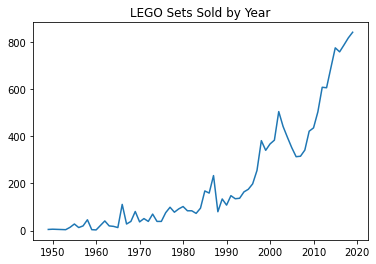

In [332]:
plt.title("LEGO Sets Sold by Year")
plt.plot(annual_sets[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [333]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [334]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace= True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [335]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

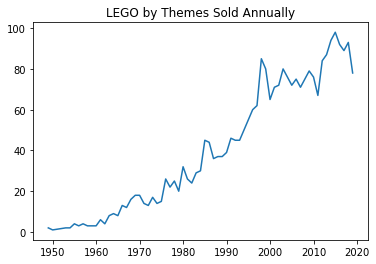

In [336]:
plt.title("LEGO by Themes Sold Annually")
plt.plot(themes_by_year[:-2])

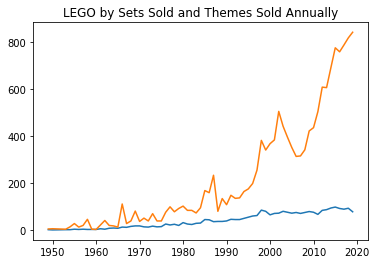

In [337]:
plt.title("LEGO by Sets Sold and Themes Sold Annually")
plt.plot(themes_by_year[:-2])
plt.plot(annual_sets[:-2])

> It is possible to plot both of the curves on a logarythmic axis since the data ranges are a factor of ten apart (one ranges from 0 - 90 and the other from 0 - 900).  It can be inferred that quite a close relationship exists between the number of different sets and themes offered.  The linear axes plot above makes this relationship almost impossible to distinguish.

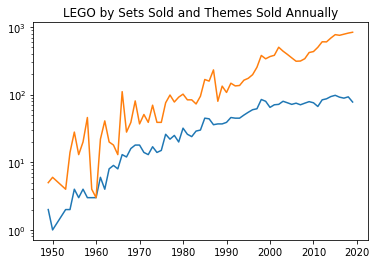

In [338]:
plt.title("LEGO by Sets Sold and Themes Sold Annually")
plt.yscale('log')
plt.plot(themes_by_year[:-2])
plt.plot(annual_sets[:-2])

### Line Charts with Two Seperate Axes

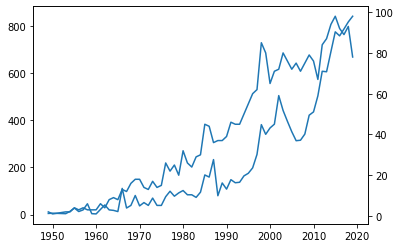

In [339]:
ax1 = plt.gca()  # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(annual_sets.index[:-2], annual_sets.name[:-2])
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

> Distiguishing the two line plots with styling.

Text(0, 0.5, 'Nuber of Themes')

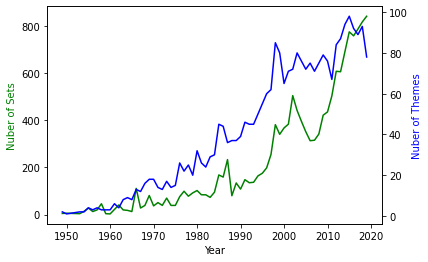

In [340]:
ax1 = plt.gca()  # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(annual_sets.index[:-2], annual_sets.name[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Nuber of Sets', color='green')
ax2.set_ylabel('Nuber of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [341]:
sets_df[sets_df['year'] == 1953]

,set_num,name,year,theme_id,num_parts
9525,700.1-2,Extra-Large Gift Set (Mursten),1953,366,0
9530,700.1.4-1,Individual 1 x 2 Bricks,1953,371,1
9541,700.3.4-1,Individual 2 x 3 Bricks,1953,371,5
9557,700.F-1,Automatic Binding Bricks - Small Brick Set (Le...,1953,371,48


In [342]:
sets_df[['year', 'name', 'num_parts']]

,year,name,num_parts
0,1965,Gears,43
1,1978,Town Mini-Figures,12
2,1987,Castle 2 for 1 Bonus Offer,0
3,1979,Space Mini-Figures,12
4,1979,Space Mini-Figures,12
...,...,...,...
15705,1996,Wild West Limited Edition Gift Pack,0
15706,2019,Christmas Tree,26
15707,2019,Mini X-Wing Fighter,60
15708,2019,X-Wing Trench Run,52


In [343]:
from numpy.lib.function_base import average
sets_df.groupby('year')['num_parts'].agg(average)

year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
           ...    
2017    221.840967
2018    213.618873
2019    207.510714
2020    259.732938
2021      0.000000
Name: num_parts, Length: 71, dtype: float64

In [344]:
average_parts = sets_df.groupby('year').agg({'num_parts': pd.Series.mean}).round(1) 

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

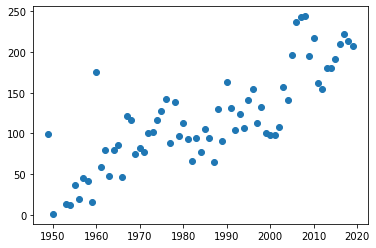

In [345]:
plt.scatter(average_parts.index[:-2], average_parts.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [346]:
sets_per_theme = sets_df["theme_id"].value_counts()[:5]
sets_per_theme

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='https://i.imgur.com/Sg4lcjx.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [347]:
themes_df = pd.read_csv('data/themes.csv')

In [348]:
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [349]:
themes_df[themes_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [350]:
sets_df[sets_df.theme_id == 261]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


In [351]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [352]:
sets_per_theme = pd.DataFrame({'id': sets_per_theme.index, 
                                'set_count': sets_per_theme.values})
sets_per_theme.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [353]:
merged_df = pd.merge(sets_per_theme, themes_df, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


Text(0.5, 1.0, 'LEGO Sets by Theme')

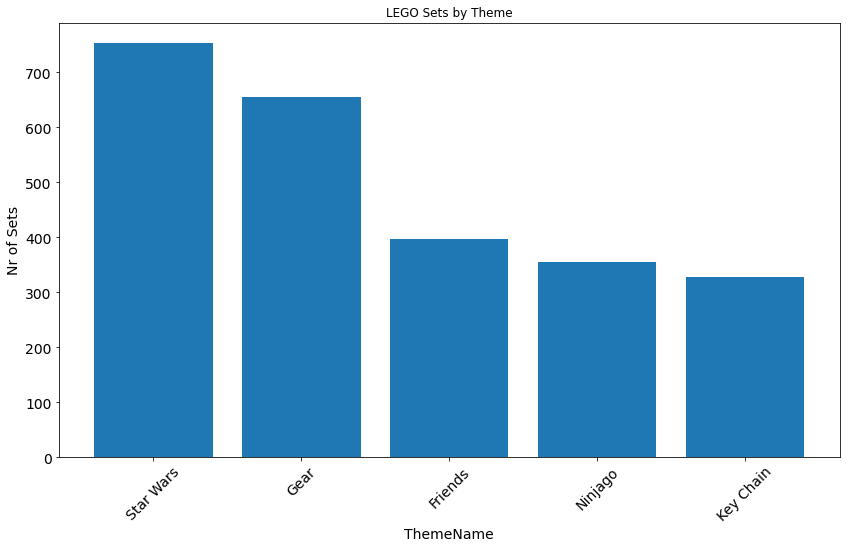

In [357]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('ThemeName', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])
plt.title("LEGO Sets by Theme")